In [1]:
#Pipeline imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
import glob
import numpy as np
import matplotlib.pyplot as plt
import wirc_drp.wirc_object as wo
import wirc_drp.constants as constants
from wirc_drp.utils import calibration, spec_utils as su, image_utils as iu
from wirc_drp.masks import *

In [2]:
#Here we create lists of filepaths to the .fits files used for background sky frames and science frames respectively
#You'll need to manually set the filepaths to the appropriate directories
sky_frames = sorted(glob.glob('/home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/*.fits'))
sci_frames = sorted(glob.glob('/home/mmnguyen/Research/WIRC+POL/Data/20180421/Science/*.fits'))

In [3]:
#Let's read in the first science frame. When we create the wirc_data object, we can call it with 
#the ref_lib library kwarg to use the list of sky frames as our reference library for PCA subtraction
raw_data = wo.wirc_data(sci_frames[0], ref_lib=sky_frames)

Creating a new wirc_data object from file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Science/image0143.fits
Found a J-band filter in the header of file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Science/image0143.fits


Finding sources


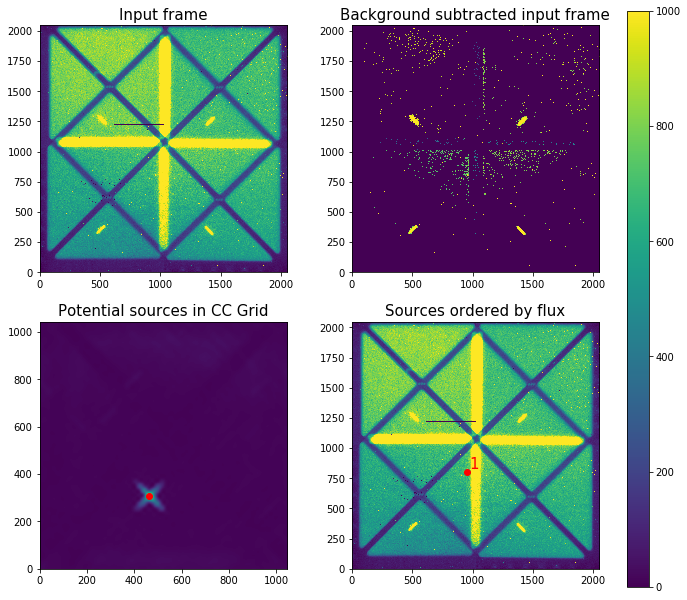

Source positions ordered by flux: [(956, 805)]
Trace fluxes: [10530]


In [4]:
#To find sources in the image, we use the find_sources_v2 method.
#There was already a find_sources() method in the pipeline, so I created a second one and labeled it _v2 to avoid
#deleting the previous version.

# KWARGS:
# ------
# cross_correlation_template: 2-D np.array
#     By default, uses the cross correlation template in masks subdirectory of wirc_drp, 
#     but if you provide a template, it will use that instead. (default = None)
# sigma_threshold: fl
#     only keeps sources that have a flux above specified sigma threshold. (default = 0)
# show_plots: bool
#     if True, shows plots. (default = True)

raw_data.find_sources_v2(sigma_threshold=0, show_plots=True)

In [5]:
#To do PCA subtraction, you need to make sure a reference library has been read in.
#Once you have this, you can use the calibrate method with the new kwarg "num_PCA_modes" 
#to do PCA subtraction. 

#This kwarg accepts integers in range: 0 < num_PCA_modes =< number of images in reference library

raw_data.calibrate(num_PCA_modes=20)

No dark filename found, continuing without subtracting a dark
No flat filename found, continuing without divinding by a falt
Performing PCA background subtraction using 20 modes
No Bad pixel map filename found, continuing without correcting bad pixels


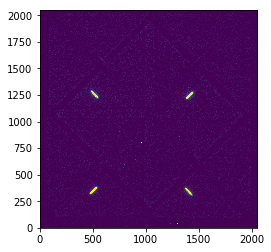

In [9]:
#plotting the PCA subtracted image for fun
plt.imshow(raw_data.full_image, origin='lower', vmin=0, vmax=1000)

Masking sources.


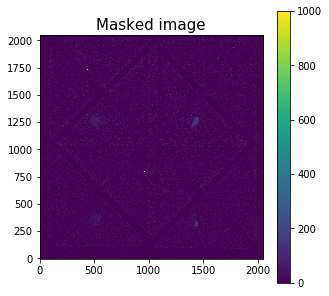

In [10]:
#There is also the option to mask sources in the image. If the source positions in the image have not been found
#yet, this method will run the source finding algorithm first.

# KWARGS:
# ------
# trace_template: 2-D np.array
#     By default, uses the trace_template under wircpol_masks module of wirc_drp, but if you provide a template, it will use that instead. (Default=None)
# sigma_threshold: fl
#     This is the same kwarg as in find_sources_v2(). This is only used if you call mask_sources()
#     before running find_sources_v2().
# boxsize: int
#     size of box used to do median fill of traces. (Default=10)
# save_path: str
#     if not None, saves masked image as .fits file to specified path. (Default=None)
# show_plots: bool
#     if True, shows masked image and source finder plots (if source finder not run yet). (Default=True)
# overwrite: bool
#     if True, overwrites full_image with masked image. Else, saves masked image to self.masked_image (Default=False)

raw_data.mask_sources()

Creating a new wirc_data object from file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0248.fits
Found a J-band filter in the header of file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0248.fits
Need to find sources first. Running source finding algorithm.
Finding sources


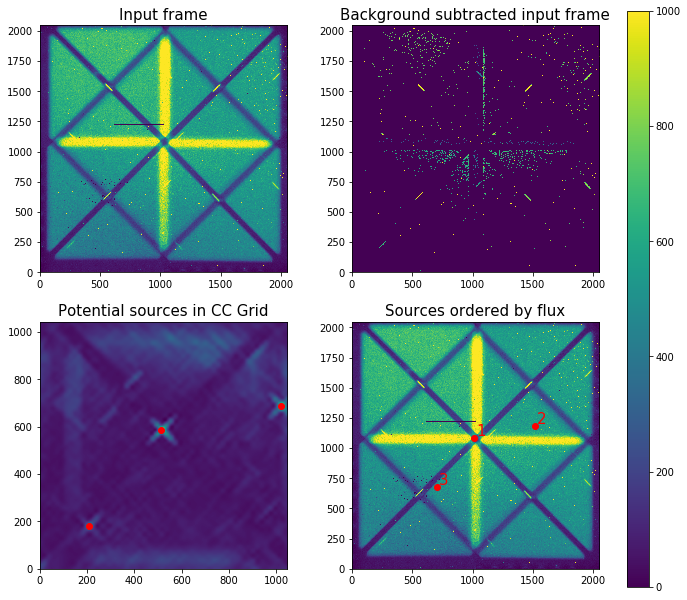

Source positions ordered by flux: [(1010, 1082), (1516, 1182), (703, 678)]
Trace fluxes: [1333, 865, 793]
Masking sources.


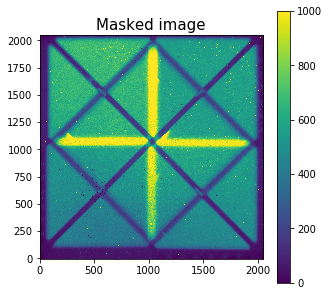

Creating a new wirc_data object from file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0354.fits
Found a J-band filter in the header of file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0354.fits
Need to find sources first. Running source finding algorithm.
Finding sources


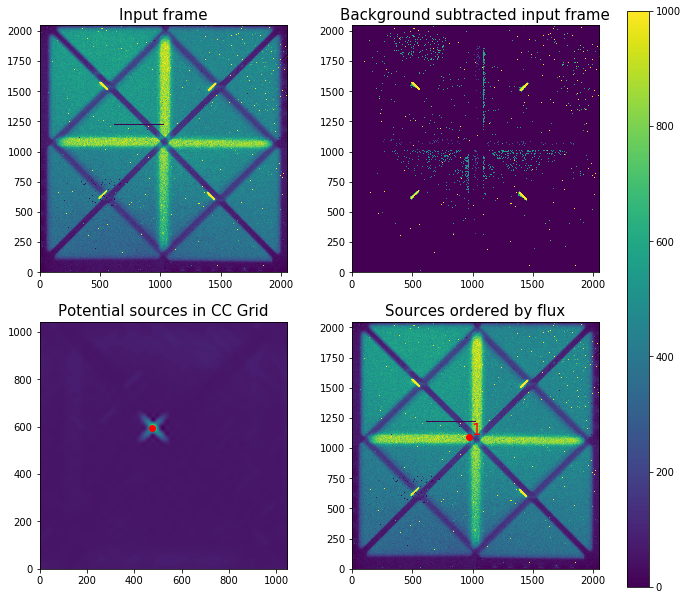

Source positions ordered by flux: [(972, 1091)]
Trace fluxes: [6128]
Masking sources.


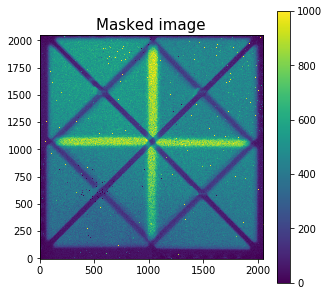

Creating a new wirc_data object from file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0482.fits
Found a J-band filter in the header of file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0482.fits
Need to find sources first. Running source finding algorithm.
Finding sources


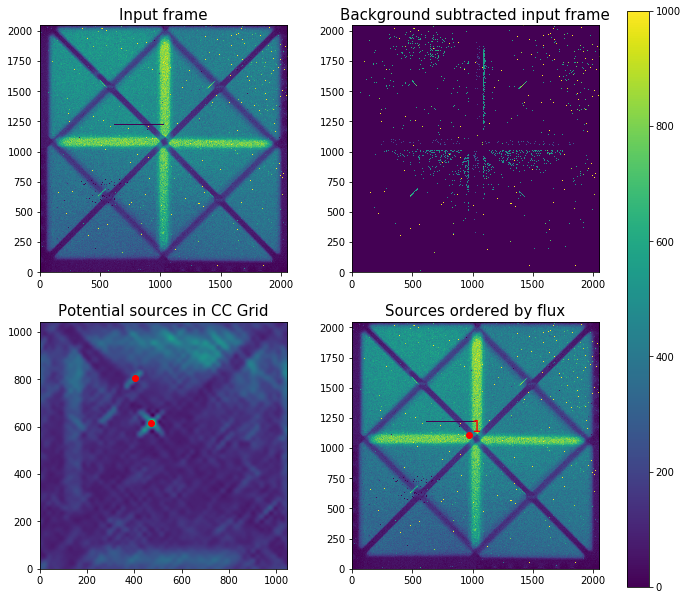

Source positions ordered by flux: [(968, 1112)]
Trace fluxes: [814]
Masking sources.


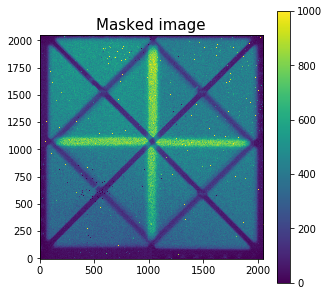

Creating a new wirc_data object from file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0608.fits
Found a J-band filter in the header of file /home/mmnguyen/Research/WIRC+POL/Data/20180421/Sky/image0608.fits
Need to find sources first. Running source finding algorithm.
Finding sources


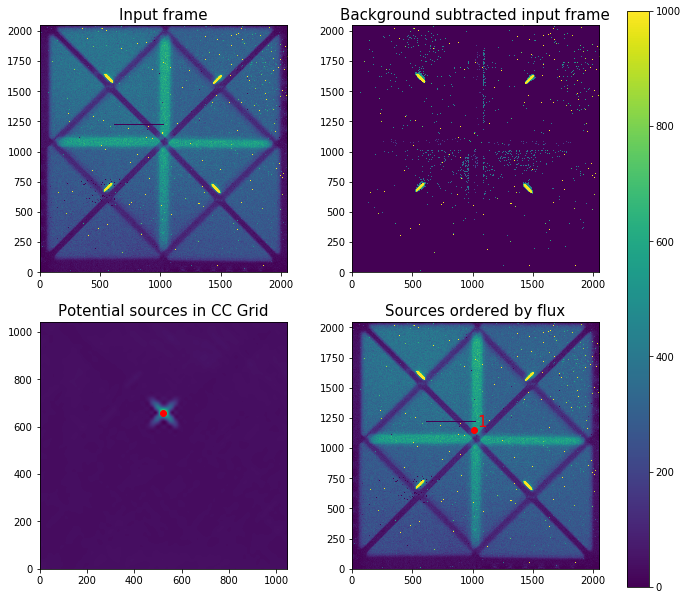

Source positions ordered by flux: [(1016, 1154)]
Trace fluxes: [8847]
Masking sources.


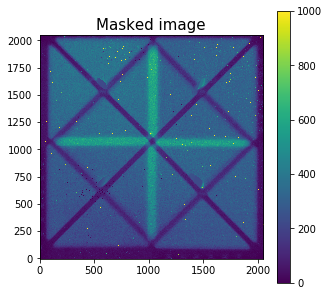

In [12]:
#running the source finding/masking algorithm on some random sky frames for fun to test robustness
for i in [5, 10, 15, 20]:
    sky_frame = wo.wirc_data(sky_frames[i])
    sky_frame.mask_sources()